In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px #histogram for visualizing gender variable
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)   # setting to display all columns
pd.options.plotting.backend = "plotly"

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Autism_Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv("/content/Autism_Data.csv")

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [3]:
display(df.shape)

(704, 21)

In [4]:
# Rename columns
df = df.rename(columns={'austim': 'autism', 'contry_of_res': 'country_of_res', 'jundice': 'jaundice'})

# Replace values in 'ethnicity' column
df['ethnicity'] = df['ethnicity'].replace(['others', '?'], 'Others')


In [5]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [6]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [7]:
df['age'].max(),df['age'].min()

('?', '17')

In [8]:
df[df['age'] == df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
62,0,0,0,0,0,0,0,0,0,0,?,m,Others,no,no,'Saudi Arabia',no,0,'18 and more',?,NO
91,0,1,0,0,1,0,1,0,0,1,?,f,Others,no,no,Jordan,no,4,'18 and more',?,NO


In [9]:
# Replace '?' with NaN
df['age'] = df['age'].replace('?', np.nan)

# Convert 'age' to numeric
df['age'] = pd.to_numeric(df['age'])

# Calculate the mean age (excluding NaN values)
mean_age = df['age'].mean()

# Replace NaN values (originally '?') with the mean age
df['age'] = df['age'].fillna(mean_age)

In [10]:
# dropping record number 52
df.drop(index = 52, inplace = True)

# resetting index
df.reset_index(inplace = True)

In [11]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [12]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: gender

Unique values:
['f' 'm']


-------------------------------
Column name: ethnicity

Unique values:
['White-European' 'Latino' 'Others' 'Black' 'Asian' "'Middle Eastern '"
 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish']


-------------------------------
Column name: jaundice

Unique values:
['no' 'yes']


-------------------------------
Column name: autism

Unique values:
['no' 'yes']


-------------------------------
Column name: country_of_res

Unique values:
["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland'
 "'United Arab Emirates'" 'Afghanistan' 'Lebanon' "'United Kingdom'"
 "'South Africa'" 'Italy' 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China'
 'Australia' 'Canada' "'Saudi Arabia'" 'Netherlands' 'Romania' 'Sweden'
 'Tonga' 'Oman' 'India' 'Philippines' "'Sri Lanka'" "'Sierra Leone'"
 'Ethiopia' "'Viet Nam'" 'Iran' "'Costa Rica'" 'Germany' 'Mexico' 'Russia'

In [13]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

In [14]:
df['relation'].unique()

array(['Self', 'Parent', "'Health care professional'", 'Relative',
       'Others'], dtype=object)

In [15]:
fig = px.histogram(df, x="gender",
                   template='plotly_dark',
                   color_discrete_sequence = ["#84A9AC"])

fig.update_layout(title = "<b>Counts of Male and Female</b>",
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [16]:
fig = px.pie(df, names = "gender",
             title = "<b>Counts of Male and Female</b>",
             hole = 0.5, template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [17]:
fig = px.pie(df, names = "Class/ASD",
             title = "<b>Autism Spectrum Disorder Counts</b>",hole=0.5,
             template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [18]:
fig = df.groupby('gender').agg({'age':'mean'}).plot(kind='bar',
                                                    template = "plotly_dark",
                                                    title = "<b>Average Age</b>",
                                                    labels = {"gender":"Gender",
                                                              "value":"Age"},
                                                    color_discrete_sequence = ["#84b1b5"]);

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),)


fig.show()

In [19]:
fig = df[df['Class/ASD'] == "YES"]['gender'].value_counts().plot(kind = 'bar',
                                                                 template = "plotly_dark",
                                                                 color_discrete_sequence = ["#84b1b5"],
                                                                 labels = {"index":"Gender",
                                                                          "value":"Counts"});

fig.update_layout(title = "<b>Gender Count of ASD Patients</b>\n",
                  title_font = dict(size = 20), width = 600)

fig.show()

In [20]:
asd_patients_country_wise = pd.DataFrame(df[df['Class/ASD'] == "YES"]['country_of_res'].value_counts()).rename({"country_of_res":"ASD_Patient_Counts"}, axis = 1)

In [21]:
asd_patients_country_wise.style.bar(color="#84A9AC")

,count
country_of_res,
'United States',53
'United Kingdom',29
'New Zealand',15
Australia,12
Canada,10
India,6
France,5
Brazil,5
Netherlands,4


In [22]:
asd_patients_country_wise.index

Index([''United States'', ''United Kingdom'', ''New Zealand'', 'Australia',
       'Canada', 'India', 'France', 'Brazil', 'Netherlands', 'Malaysia',
       'Mexico', 'Italy', ''United Arab Emirates'', 'Austria', 'Russia',
       'Spain', ''South Africa'', 'Jordan', 'Afghanistan', 'Germany', 'Sweden',
       'Ireland', 'Bahamas', ''Sierra Leone'', 'China', 'Romania',
       ''Viet Nam'', ''Saudi Arabia'', 'Bangladesh', 'Uruguay', 'Argentina',
       'AmericanSamoa', 'Finland', 'Nepal', 'Pakistan', 'Belgium', 'Cyprus'],
      dtype='object', name='country_of_res')

In [23]:
label = asd_patients_country_wise.index
value = asd_patients_country_wise.iloc[:, 0] # Access the first (and only) column by position or use asd_patients_country_wise['country_of_res']

fig = go.Figure(data=[go.Pie(labels=label,
                             values=value,
                             rotation=90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width=1.5)))

fig.update_layout(title_text='<b>Country Wise Counts of ASD Patients</b>',
                  title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15,
                  template='plotly_dark')

fig.show()

DATA PREPARATION FOR MACHINE LEARNING

In [24]:
df.drop(['index','age_desc'], axis = 1, inplace = True)

In [25]:
X = df.drop("Class/ASD", axis = 1)    # select all other feature except "Class/ASD" for training
Y = df['Class/ASD']

In [26]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [28]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (562, 102)
Shape of Y_train is: (562, 2)

Shape of X_test is: (141, 102)
Shape of Y_test is: (141, 2)


CREATING ANN MODEL

In [29]:
input_dim = X.shape[1]

In [30]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



COMPILING MODEL

In [31]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

CHECKING SUMMARY OF MODEL

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

VISUALIZING MODEL LAYERS

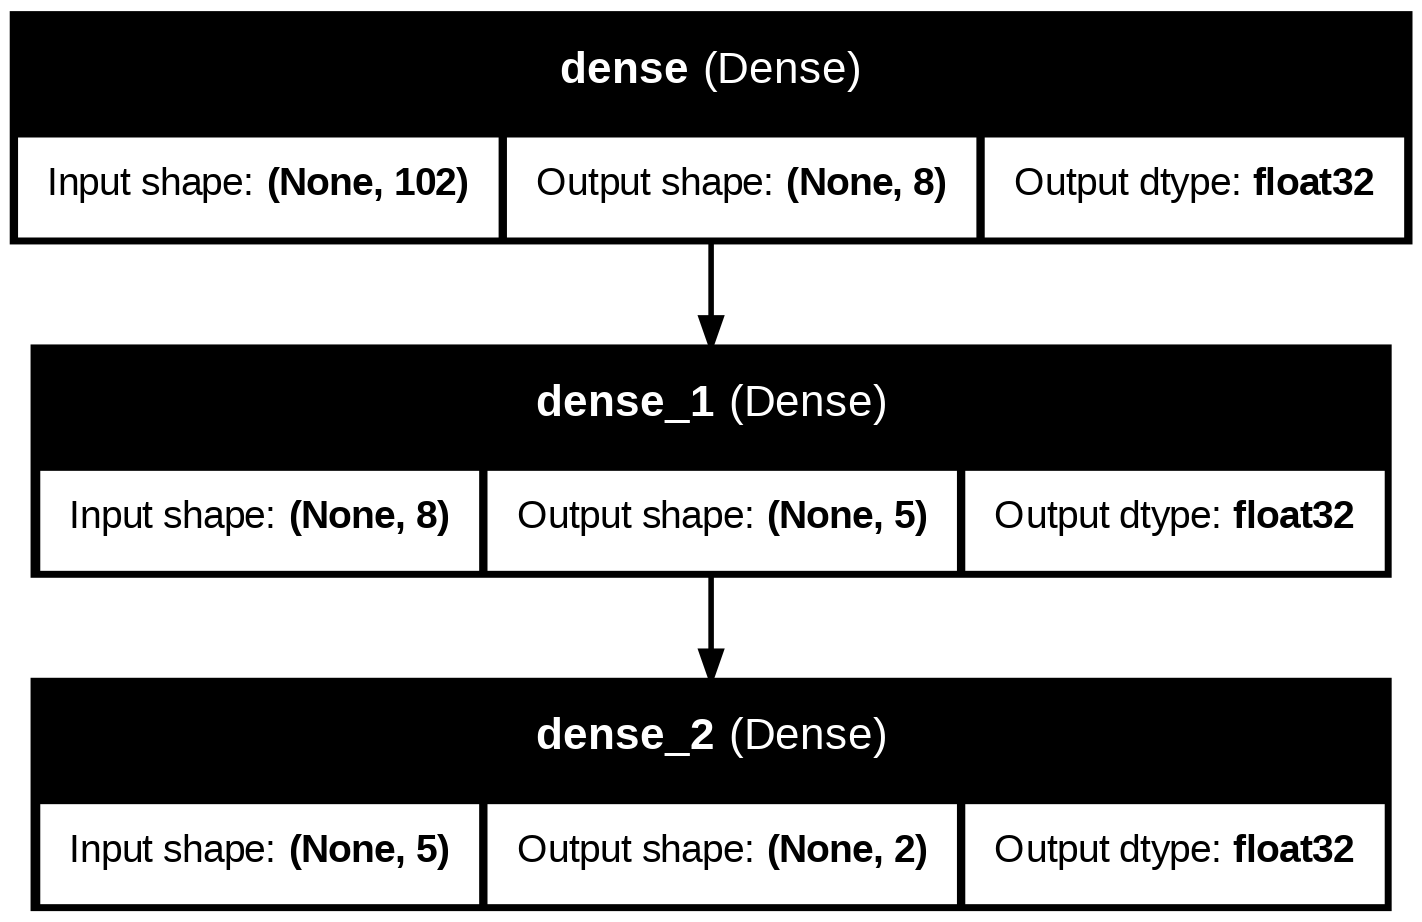

In [33]:
plot_model(model,
           show_dtype = True,
           show_layer_names = True,
           show_shapes = True)

TRAINING MODEL

In [34]:
result = model.fit(X_train, Y_train, epochs =20 , batch_size = 10)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5924 - loss: 0.6911
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7352 - loss: 0.6722
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.6409
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9264 - loss: 0.5994
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9320 - loss: 0.5495
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9546 - loss: 0.4743
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9465 - loss: 0.4144
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.3533
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9374 - loss: 0.3220
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9564 - loss: 0.2574
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.2319
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9532 - l

VISUALIZE MODEL ACCURACY AND LOSS

In [35]:
acc = result.history['accuracy']
loss = result.history['loss']

epoch = [i + 1 for i in range(len(acc))]

In [36]:
acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : loss,
                            "Epoch" : epoch})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])

,Accuracy,Loss,Epoch
0,0.699288,0.686307,1
1,0.736655,0.666316,2
2,0.806050,0.634568,3
3,0.927046,0.584306,4
4,0.935943,0.528548,5
5,0.950178,0.463345,6
6,0.948399,0.400909,7
7,0.957295,0.348869,8
8,0.950178,0.300214,9
9,0.950178,0.259735,10


In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Loss'],
                         mode='lines+markers',
                         name = 'Loss'))

fig.update_layout(title = {'text': "<b>Training Accuracy Vs Training Loss</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Accuracy / Loss",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()

EVALUATING MODEL

In [38]:
loss, acc = model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9704 - loss: 0.1187


In [39]:
print(f"Accuracy on unseen data is: { np.round(acc, 2) }")
print(f'Loss on unseen data is: { np.round(loss, 2) }')

Accuracy on unseen data is: 0.96
Loss on unseen data is: 0.12


CLASSIFICATION REPORT

In [40]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis = 1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [41]:
print(accuracy_score(Y_test[['YES']], prediction))

0.9645390070921985


In [42]:
print(classification_report(Y_test[['YES']], prediction))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       100
        True       0.95      0.93      0.94        41

    accuracy                           0.96       141
   macro avg       0.96      0.95      0.96       141
weighted avg       0.96      0.96      0.96       141



In [43]:


model.save('autism_prediction_model.h5')
